# Метрики машинного обучения

Ермаков Петр

https://ermakovpetr.ru

## Метрики классификации

### true positive, false positive, true negative, false negative

<img src="metrics_data/class_main.png" alt="Drawing" style="height: 300px;"/>

<img src="https://miro.medium.com/max/924/1*7EYylA6XlXSGBCF77j_rOA.png" alt="Drawing" style="height: 300px;"/>

In [1]:
from sklearn.metrics import confusion_matrix

In [2]:
y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 0, 0, 0, 1, 0, 1, 1, 1, 1]

confusion_matrix(y_true, y_pred)

array([[4, 1],
       [1, 4]])

In [3]:
import pandas as pd

In [4]:
pd.DataFrame(confusion_matrix(y_true, y_pred))

,0,1
0,4,1
1,1,4


In [5]:
pd.DataFrame([['tn', 'fp'], ['fn', 'tp']])

,0,1
0,tn,fp
1,fn,tp


<img src="metrics_data/1.png" alt="Drawing" style="height: 300px;"/>

## precision / recall
### Precision, Positive Predictive Value
### Sensitivity, True Positive Rate, Recall, Hit Rate

<img src="metrics_data/pre_re.png" alt="Drawing" style="height: 300px;"/>

<img src="https://alexanderdyakonov.files.wordpress.com/2019/05/f4.png" alt="Drawing"/>

<img src="https://alexanderdyakonov.files.wordpress.com/2019/05/f3.png" alt="Drawing"/>

In [17]:
from sklearn.metrics import precision_score, recall_score

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 0, 0, 0, 1, 0, 1, 1, 1, 1]

precision_score(y_true, y_pred)

0.8

In [18]:
recall_score(y_true, y_pred)

0.8

/home/jupyterhub/jupyterhub_venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


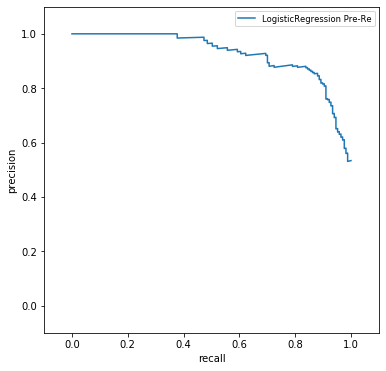

In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt


X, y = make_classification(n_samples=1000, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

predict = LogisticRegression().fit(X_train, y_train).predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, predict[:,1])


plt.figure(figsize=(6,6))
plt.plot(recall, precision, label='%s Pre-Re' % ('LogisticRegression'))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc=0, fontsize='small')
plt.show()

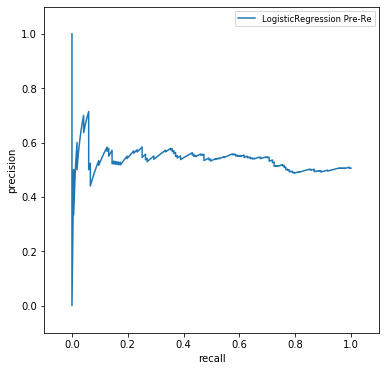

In [20]:
precision, recall, thresholds = precision_recall_curve(y_test, np.random.random(y_test.shape))


plt.figure(figsize=(6,6))
plt.plot(recall, precision, label='%s Pre-Re' % ('LogisticRegression'))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc=0, fontsize='small')
plt.show()

## f-beta
## f1


<img src="https://miro.medium.com/max/1014/0*EmsPaEcKpCpcT5OM" alt="Drawing"/>

In [23]:
from sklearn.metrics import f1_score

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 0, 0, 0, 1, 0, 1, 1, 1, 1]

f1_score(y_true, y_pred)

0.8000000000000002

## accuracy

<img src="https://alexanderdyakonov.files.wordpress.com/2019/05/f2.png" alt="Drawing"/>

In [30]:
from sklearn.metrics import accuracy_score

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 0, 0, 0, 1, 0, 1, 1, 1, 1]

accuracy_score(y_true, y_pred)

0.8

In [31]:
# Спойлер















In [32]:
from sklearn.metrics import accuracy_score

y_true = [0]*10000+[1]*100
y_pred = [0]*10099+[1]*1

accuracy_score(y_true, y_pred), \
f1_score(y_true, y_pred)

(0.9901980198019802, 0.019801980198019802)

## FPR
### False Positive Rate (FPR, fall-out, false alarm rate)

<img src="https://miro.medium.com/max/430/0*Vy2ds1i44pbM7PqV" alt="Drawing"/>

## ROC-AUC

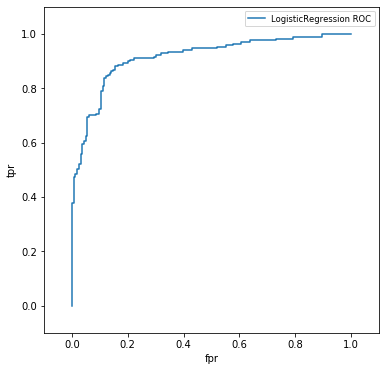

In [85]:
predict[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])


plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='%s ROC' % ('LogisticRegression'))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc=0, fontsize='small')
plt.show()

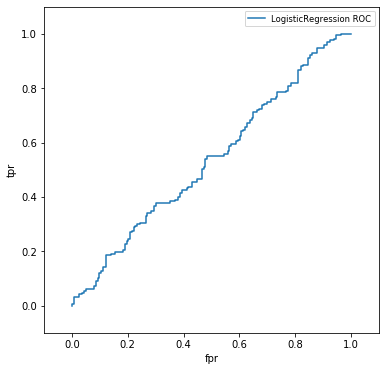

In [86]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, np.random.random(y_test.shape))


plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='%s ROC' % ('LogisticRegression'))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc=0, fontsize='small')
plt.show()

In [ ]:
https://habr.com/ru/post/267217/